# PROJECT - CRISP_DM
### Cross-Industry Standard Process for Data Mining

<font color=blue>First Udacity Project</font>

Key Steps for Project
Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:

Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize

Provide a clear connection between your business questions and how the data answers them.
4) Communicate your business insights:

Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience
Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

# Questions to be answered

#### 1- Better country have better salaries ?
#### 2- Which gender has the highest salary ?
#### 3- Do those who work from home are those who Program as hobby as well ?
#### 4- Do the larger company have more employees who work from home ?
#### 5- What race has the highest salary ?


In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the data

df = pd.read_csv('data.csv')

In [3]:
# Visualizing the first 5 lines

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# The shape of the data

print(f'Dataframe has {df.shape[0]} lines and {df.shape[1]} columns')

Dataframe has 19102 lines and 154 columns


In [5]:
# Amount of NA's for each column
df.isna().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting     6366
QuestionsConfusing       6396
InterestedAnswers        6342
Salary                  14093
ExpectedSalary          18284
Length: 154, dtype: int64

In [6]:
# Which column has more than 90% of missing values?

cols = df.loc[:,df.isna().mean() > .90].columns
df.loc[:,df.isna().mean() > .90].columns

Index(['YearsCodedJobPast', 'MobileDeveloperType', 'NonDeveloperType',
       'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years',
       'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode',
       'ExCoderActive', 'TimeAfterBootcamp', 'ExpectedSalary'],
      dtype='object')

In [7]:
# Let's drop these columns

cols = df.loc[:,df.isna().mean() > .90].columns
df.drop(columns=cols, inplace=True)

In [8]:
# Visualize

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Let's use only the necessary columns to answer the questions

cols = ['Country', 'Salary', 'Gender', 'CompanySize', 'HomeRemote', 'Race', 'ProgramHobby']

new_df = df[cols]

In [10]:
# View the first 5 line of our new dataset

new_df.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,NaN,Male,NaN,NaN,White or of European descent,"Yes, both"
1,United Kingdom,NaN,Male,20 to 99 employees,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,113750.0,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,NaN,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,NaN,NaN,10 to 19 employees,Never,NaN,"Yes, I program as a hobby"


In [11]:
# Types of features
new_df.dtypes

Country          object
Salary          float64
Gender           object
CompanySize      object
HomeRemote       object
Race             object
ProgramHobby     object
dtype: object

In [12]:
# Checking the amount of missing values

new_df.isna().sum()

Country             0
Salary          14093
Gender           6192
CompanySize      4449
HomeRemote       2631
Race             6884
ProgramHobby        0
dtype: int64

In [13]:
# Filling the missing values with the mean for float type columns, in this case we only have one: salary

new_df['Salary'].fillna(np.mean(new_df.Salary), inplace=True)

C:\Users\Windows\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
# Visualize the data

new_df.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,58341.398571,Male,NaN,NaN,White or of European descent,"Yes, both"
1,United Kingdom,58341.398571,Male,20 to 99 employees,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,113750.000000,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,58341.398571,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,58341.398571,NaN,10 to 19 employees,Never,NaN,"Yes, I program as a hobby"


In [15]:
# Now, let's fill the missing values for categorical variables, in this case with the mode

# Function to get the mode and fill missing value
mode = lambda x: x.fillna(pd.Series.mode(x)[0])

# Filtering only categorical columns
cat_cols = new_df.select_dtypes('object').columns

# Using method apply to use our function in each column and visualizing it
new_df[cat_cols].apply(mode)

,Country,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,Male,20 to 99 employees,A few days each month,White or of European descent,"Yes, both"
1,United Kingdom,Male,20 to 99 employees,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,Male,10 to 19 employees,Never,White or of European descent,"Yes, I program as a hobby"
...,...,...,...,...,...,...
19097,Canada,Male,10 to 19 employees,A few days each month,White or of European descent,"Yes, I program as a hobby"
19098,India,Male,20 to 99 employees,A few days each month,White or of European descent,"Yes, I program as a hobby"
19099,United Kingdom,Male,20 to 99 employees,Never,White or of European descent,"Yes, I program as a hobby"
19100,United States,Male,100 to 499 employees,"Less than half the time, but at least one day ...",White or of European descent,"Yes, I program as a hobby"


In [16]:
# Assign the new values to dataframe
new_df.loc[:,cat_cols] = new_df.loc[:,cat_cols].apply(mode)

C:\Users\Windows\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
# Visualizing again
new_df.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,58341.398571,Male,20 to 99 employees,A few days each month,White or of European descent,"Yes, both"
1,United Kingdom,58341.398571,Male,20 to 99 employees,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,113750.000000,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,58341.398571,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,58341.398571,Male,10 to 19 employees,Never,White or of European descent,"Yes, I program as a hobby"


In [18]:
# Checking the shape
new_df.shape

(19102, 7)

In [19]:
# Checking the amount of NA's
new_df.isna().sum()

Country         0
Salary          0
Gender          0
CompanySize     0
HomeRemote      0
Race            0
ProgramHobby    0
dtype: int64

#### Now we have a clean dataframe, therefore we are able to analysing the data and answer the questions asked in the beggining of the project

### First Question: Better country have better salaries ?

In [20]:
# First Question: Better country have better salaries ?
df1 = new_df.groupby('Country')['Salary'].agg(['mean', 'std', 'min', 'max'])\
                                         .sort_values(ascending=False, by='mean').reset_index().head(10)
df1

,Country,mean,std,min,max
0,Bermuda,104170.699285,64812.418625,58341.398571,150000.000000
1,Puerto Rico,86170.699285,62742.542487,48000.000000,180000.000000
2,Liechtenstein,84910.349643,37846.791504,58341.398571,140000.000000
3,United States,71971.286267,27794.682957,92.000000,195000.000000
4,Switzerland,68071.902598,24578.308918,96.000000,190000.000000
5,Kuwait,67817.832142,23212.426832,58341.398571,115200.000000
6,Norway,64917.065157,17756.434363,8373.205742,143540.669856
7,Australia,62252.970487,15355.869565,0.757576,174242.424242
8,Venezuela,61712.599347,28786.306254,10622.009569,160000.000000
9,Denmark,61654.534419,22771.853622,4558.404558,180000.000000


In [21]:
# Creating new column with the number of time that each country showed up in the dataset
df1 = df1.sort_values(by='Country')
df1['Qtd'] = new_df.Country[new_df.Country.isin(df1['Country'].values)].value_counts().sort_index().values

In [22]:
# Visualizing
df1.style.background_gradient(cmap='GnBu')

,Country,mean,std,min,max,Qtd
7,Australia,62252.970487,15355.869565,0.757576,174242.424242,399
0,Bermuda,104170.699285,64812.418625,58341.398571,150000.000000,2
9,Denmark,61654.534419,22771.853622,4558.404558,180000.000000,112
5,Kuwait,67817.832142,23212.426832,58341.398571,115200.000000,6
2,Liechtenstein,84910.349643,37846.791504,58341.398571,140000.000000,4
6,Norway,64917.065157,17756.434363,8373.205742,143540.669856,100
1,Puerto Rico,86170.699285,62742.542487,48000.000000,180000.000000,4
4,Switzerland,68071.902598,24578.308918,96.000000,190000.000000,242
3,United States,71971.286267,27794.682957,92.000000,195000.000000,4364
8,Venezuela,61712.599347,28786.306254,10622.009569,160000.000000,16


We can notice from the frame above that EUA has appeared most time in the dataset, and it has the max salary. Although Bermuda has the highest Salary mean, it has only observations in the dataset, so we can not conlude so much about this country.

In [23]:
# Let's take a look for only those country that appeared 100 or more times
# Visualizing the max values for each variable

df1[df1.Qtd >= 100].style.highlight_max()

,Country,mean,std,min,max,Qtd
7,Australia,62252.970487,15355.869565,0.757576,174242.424242,399
9,Denmark,61654.534419,22771.853622,4558.404558,180000.000000,112
6,Norway,64917.065157,17756.434363,8373.205742,143540.669856,100
4,Switzerland,68071.902598,24578.308918,96.000000,190000.000000,242
3,United States,71971.286267,27794.682957,92.000000,195000.000000,4364


In [24]:
# A bar graph for the mean

df1[df1.Qtd >= 100].style.bar(subset='mean', align='mid', color='#5fba7d')

,Country,mean,std,min,max,Qtd
7,Australia,62252.970487,15355.869565,0.757576,174242.424242,399
9,Denmark,61654.534419,22771.853622,4558.404558,180000.000000,112
6,Norway,64917.065157,17756.434363,8373.205742,143540.669856,100
4,Switzerland,68071.902598,24578.308918,96.000000,190000.000000,242
3,United States,71971.286267,27794.682957,92.000000,195000.000000,4364


We can say YES, better countries have better salaries, as I expected.

### Second Question: Which gender has the highest salary ?

In [25]:
# Visualizing the amount of each differente gender
new_df.Gender.value_counts()

Male                                                       17856
Female                                                       970
Other                                                         73
Gender non-conforming                                         54
Male; Other                                                   42
Female; Transgender                                           28
Transgender                                                   20
Male; Gender non-conforming                                   19
Female; Gender non-conforming                                 11
Male; Female                                                   5
Transgender; Gender non-conforming                             5
Male; Female; Transgender; Gender non-conforming; Other        4
Male; Transgender                                              4
Female; Transgender; Gender non-conforming                     3
Male; Female; Transgender; Gender non-conforming               2
Male; Female; Transgender

In [26]:
# Let's focus on the gender Male, Female, Transgender

genders = ['Male', 'Female', 'Transgender']

In [27]:
# Subsetting dataset
df2 = new_df[new_df.Gender.isin(genders)]
df2.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,58341.398571,Male,20 to 99 employees,A few days each month,White or of European descent,"Yes, both"
1,United Kingdom,58341.398571,Male,20 to 99 employees,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,113750.000000,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,58341.398571,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,58341.398571,Male,10 to 19 employees,Never,White or of European descent,"Yes, I program as a hobby"


In [28]:
# Informations about salary for each gender
df2.groupby('Gender')['Salary'].agg(['mean','std','max']).style.highlight_max(subset='mean')

,mean,std,max
Gender,,,
Female,57889.419980,21660.820899,195000.000000
Male,58328.596393,20748.459197,195000.000000
Transgender,61819.758714,18598.739800,140000.000000


Besides we have only 20 transgenders in our dataset, they have the highest mean salary.
Let's check more information about transgenders.

In [29]:
# Subsetting dataframe with only transgenders
trans = new_df[new_df.Gender == 'Transgender']
trans.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
878,Turkey,58341.398571,Transgender,20 to 99 employees,A few days each month,Middle Eastern; White or of European descent,"Yes, both"
2279,United Kingdom,58341.398571,Transgender,"10,000 or more employees",Never,White or of European descent,"Yes, I program as a hobby"
2617,United States,58341.398571,Transgender,20 to 99 employees,A few days each month,White or of European descent,"Yes, I program as a hobby"
2689,South Africa,58341.398571,Transgender,20 to 99 employees,A few days each month,White or of European descent,"Yes, I program as a hobby"
3328,Greece,58341.398571,Transgender,100 to 499 employees,A few days each month,White or of European descent,No


In [30]:
# We can see that the mean imputation wasn't a good ideia in this case
# we have only 2 differents values from that salary mean that we imputed
# so we can not conclude that transgenders have the highest salary mean
trans.Salary.value_counts()

58341.398571     18
140000.000000     1
46250.000000      1
Name: Salary, dtype: int64

In [31]:
# Let's check the mean for the genders male and female
new_df.loc[new_df.Gender.isin(['Male','Female'])].groupby('Gender')['Salary'].mean()\
                        .reset_index().style.highlight_max(color='lightgreen')

,Gender,Salary
0,Female,57889.419980
1,Male,58328.596393


There's a slight difference between the salary mean for men and women

### Third Question: Do those who work from home are those who Program as hobby as well ?

In [32]:
# Visualize
new_df.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,58341.398571,Male,20 to 99 employees,A few days each month,White or of European descent,"Yes, both"
1,United Kingdom,58341.398571,Male,20 to 99 employees,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,113750.000000,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,58341.398571,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,58341.398571,Male,10 to 19 employees,Never,White or of European descent,"Yes, I program as a hobby"


In [33]:
# Filtering the dataset
subset = new_df[['HomeRemote', 'ProgramHobby']]
subset.head()

,HomeRemote,ProgramHobby
0,A few days each month,"Yes, both"
1,"More than half, but not all, the time","Yes, both"
2,"Less than half the time, but at least one day ...","Yes, both"
3,"Less than half the time, but at least one day ...","Yes, both"
4,Never,"Yes, I program as a hobby"


In [34]:
# Frequency table
print("How often people work from home\n")
print(subset.HomeRemote.value_counts(),'\n')

How often people work from home

A few days each month                                      8507
Never                                                      5288
All or almost all the time (I'm full-time remote)          1922
Less than half the time, but at least one day each week    1464
More than half, but not all, the time                       676
It's complicated                                            633
About half the time                                         612
Name: HomeRemote, dtype: int64 



In [35]:
# Frequency table
print("How often people work from home %\n")
print(subset.HomeRemote.value_counts(normalize=True),'\n')

How often people work from home %

A few days each month                                      0.445346
Never                                                      0.276830
All or almost all the time (I'm full-time remote)          0.100618
Less than half the time, but at least one day each week    0.076641
More than half, but not all, the time                      0.035389
It's complicated                                           0.033138
About half the time                                        0.032039
Name: HomeRemote, dtype: float64 



In [36]:
# Frequency table
print("How many people Program as a Hobby\n")
print(subset.ProgramHobby.value_counts())

How many people Program as a Hobby

Yes, I program as a hobby                    9260
Yes, both                                    5033
No                                           3661
Yes, I contribute to open source projects    1148
Name: ProgramHobby, dtype: int64


In [37]:
# Frequency table
print("How many people Program as a Hobby %\n")
print(subset.ProgramHobby.value_counts(normalize=True))

How many people Program as a Hobby %

Yes, I program as a hobby                    0.484766
Yes, both                                    0.263480
No                                           0.191655
Yes, I contribute to open source projects    0.060098
Name: ProgramHobby, dtype: float64


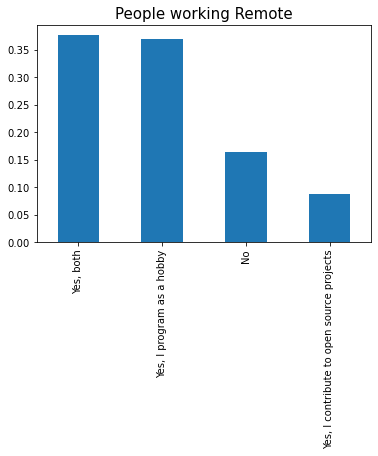

In [38]:
# From people who work from home, how many program as a hobby ?
subset[subset.HomeRemote == "All or almost all the time (I'm full-time remote)"]['ProgramHobby']\
    .value_counts(normalize=True).plot(kind='bar')

plt.title("People working Remote", fontsize=15);

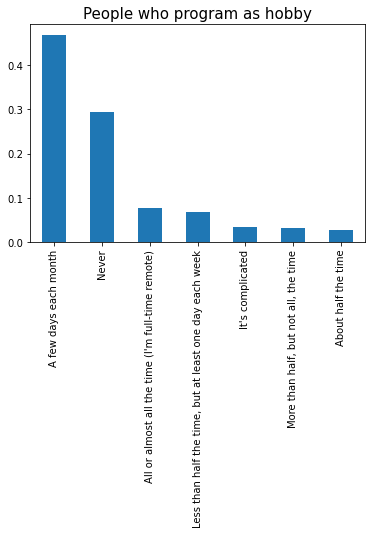

In [39]:
# People who program as hobby

subset[subset.ProgramHobby == "Yes, I program as a hobby"]['HomeRemote']\
    .value_counts(normalize=True).plot(kind='bar')

plt.title("People who program as hobby", fontsize=15);

#### The graphs don't seem to show any evidence that most of people who program as a hobby work from home.

### Fourth Question: Do the larger company have more employees who work from home ?

In [40]:
# Visualize
new_df.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,58341.398571,Male,20 to 99 employees,A few days each month,White or of European descent,"Yes, both"
1,United Kingdom,58341.398571,Male,20 to 99 employees,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,113750.000000,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,58341.398571,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,58341.398571,Male,10 to 19 employees,Never,White or of European descent,"Yes, I program as a hobby"


In [41]:
# Frequency table for Company size
new_df.CompanySize.value_counts()

20 to 99 employees          7663
100 to 499 employees        2858
10,000 or more employees    1998
10 to 19 employees          1544
1,000 to 4,999 employees    1482
Fewer than 10 employees     1456
500 to 999 employees         946
5,000 to 9,999 employees     606
I don't know                 311
I prefer not to answer       238
Name: CompanySize, dtype: int64

In [42]:
# Now I'll apply a function to classify if the company is big or small
# I'm putting a threshold of 500 employees, more than that it's big, less it's small.
mapper = {'20 to 99 employees':'small', '100 to 499 employees':'small', '10,000 or more employees':'big',
          '10 to 19 employees':'small', '1,000 to 4,999 employees':'big', 'Fewer than 10 employees':'small',
          '500 to 999 employees':'big', '5,000 to 9,999 employees':'big'}

In [43]:
# Dropping answers that I'll not use
idx = new_df[(new_df.CompanySize == "I don't know") | (new_df.CompanySize == "I prefer not to answer")].index
subset = new_df.drop(index=idx)

In [44]:
# Apply the mapper
subset.CompanySize.replace(mapper, inplace=True)

In [45]:
# View
subset.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,58341.398571,Male,small,A few days each month,White or of European descent,"Yes, both"
1,United Kingdom,58341.398571,Male,small,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,113750.000000,Male,big,"Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,58341.398571,Male,big,"Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,58341.398571,Male,small,Never,White or of European descent,"Yes, I program as a hobby"


In [60]:
subset.HomeRemote.value_counts()

A few days each month                                      8342
Never                                                      5068
All or almost all the time (I'm full-time remote)          1874
Less than half the time, but at least one day each week    1419
More than half, but not all, the time                       650
It's complicated                                            615
About half the time                                         585
Name: HomeRemote, dtype: int64

In [61]:
# Amount of employees who work from home for big companies
subset[subset.CompanySize == 'big'].groupby('CompanySize')['HomeRemote'].value_counts(normalize=True)

CompanySize  HomeRemote                                             
big          A few days each month                                      0.411765
             Never                                                      0.350954
             Less than half the time, but at least one day each week    0.096979
             All or almost all the time (I'm full-time remote)          0.045310
             It's complicated                                           0.040938
             More than half, but not all, the time                      0.027822
             About half the time                                        0.026232
Name: HomeRemote, dtype: float64

In [62]:
# Amount of employees who work from home for big companies
subset.groupby('CompanySize')['HomeRemote'].value_counts(normalize=True)

CompanySize  HomeRemote                                             
big          A few days each month                                      0.411765
             Never                                                      0.350954
             Less than half the time, but at least one day each week    0.096979
             All or almost all the time (I'm full-time remote)          0.045310
             It's complicated                                           0.040938
             More than half, but not all, the time                      0.027822
             About half the time                                        0.026232
small        A few days each month                                      0.463723
             Never                                                      0.244213
             All or almost all the time (I'm full-time remote)          0.121737
             Less than half the time, but at least one day each week    0.068856
             More than half, but not all

In [58]:
# Amount of employees who work from home for small companies
subset[subset.CompanySize == 'small'].groupby('CompanySize')['HomeRemote'].value_counts()

CompanySize  HomeRemote                                             
small        A few days each month                                      6270
             Never                                                      3302
             All or almost all the time (I'm full-time remote)          1646
             Less than half the time, but at least one day each week     931
             More than half, but not all, the time                       510
             About half the time                                         453
             It's complicated                                            409
Name: HomeRemote, dtype: int64

#### There's just a little difference between the people working from home from big companies and small companies

### Fifth Question: What race has the highest salary ?

In [64]:
# View

new_df.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,58341.398571,Male,20 to 99 employees,A few days each month,White or of European descent,"Yes, both"
1,United Kingdom,58341.398571,Male,20 to 99 employees,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,113750.000000,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,58341.398571,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,58341.398571,Male,10 to 19 employees,Never,White or of European descent,"Yes, I program as a hobby"


In [66]:
# Frequency table for race
new_df.Race.value_counts()

White or of European descent                                                                                                                                                                                                     15838
South Asian                                                                                                                                                                                                                        844
East Asian                                                                                                                                                                                                                         533
Hispanic or Latino/Latina                                                                                                                                                                                                          413
Middle Eastern                                                              

In [67]:
# Amount of unique races

new_df.Race.nunique()

59

In [71]:
# Let's work with only the first 3 races

races = list(new_df.Race.value_counts().index[:3])

In [72]:
# Subsetting

subset = new_df.loc[new_df.Race.isin(races),:]

In [73]:
# Subset dataframe

subset.head()

,Country,Salary,Gender,CompanySize,HomeRemote,Race,ProgramHobby
0,United States,58341.398571,Male,20 to 99 employees,A few days each month,White or of European descent,"Yes, both"
1,United Kingdom,58341.398571,Male,20 to 99 employees,"More than half, but not all, the time",White or of European descent,"Yes, both"
2,United Kingdom,113750.000000,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
3,United States,58341.398571,Male,"10,000 or more employees","Less than half the time, but at least one day ...",White or of European descent,"Yes, both"
4,Switzerland,58341.398571,Male,10 to 19 employees,Never,White or of European descent,"Yes, I program as a hobby"


In [74]:
# Frequency table again

subset.Race.value_counts()

White or of European descent    15838
South Asian                       844
East Asian                        533
Name: Race, dtype: int64

In [75]:
# Salary mean for each race in our subset

subset.groupby('Race')['Salary'].mean()

Race
East Asian                      58327.353126
South Asian                     51797.506652
White or of European descent    58936.994282
Name: Salary, dtype: float64

#### We can see a small difference between the salaries from East Asian and White or of European descent, but this difference increases when compared to South Asian people's salaries.

# The End

Dener Moreira,

<font color=red>GitHub:</font> https://github.com/DenerBEM